In [2]:
import numpy as np
import mne
from detection_util import preprocess_eeg, extract_rhythms, combined_deviation, detect_fatigue, read_eeg_data

In [22]:
edf_file_name = "block1.edf"
sfreq: float = 256.0

# Read EEG data from file
raw_data: mne.io.Raw = read_eeg_data(edf_file_name, sfreq)

# Baseline and remove artifacts
cleaned_data: mne.io.Raw = preprocess_eeg(raw_data)

Extracting EDF parameters from c:\Users\andre\projects\baseline\block16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 59903  =      0.000 ...   233.996 secs...
Sampling frequency of the instance is already 256.0, returning unmodified.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 0.4s.
Applyin

In [23]:
# Extract rhythms
alpha_rhythms, theta_rhythms = extract_rhythms(cleaned_data, sfreq)

In [24]:
# Compute Mahalanobis distance and combined deviation (DC)
mean_alpha = np.mean(alpha_rhythms, axis=1)
cov_alpha = np.cov(alpha_rhythms)
mean_theta = np.mean(theta_rhythms, axis=1)
cov_theta = np.cov(theta_rhythms)

dcs = []
for i in range(min(1000, alpha_rhythms.shape[1])):
	dc = combined_deviation(alpha_rhythms[:, i], theta_rhythms[:, i], mean_alpha, cov_alpha, mean_theta, cov_theta)
	dcs.append(dc)

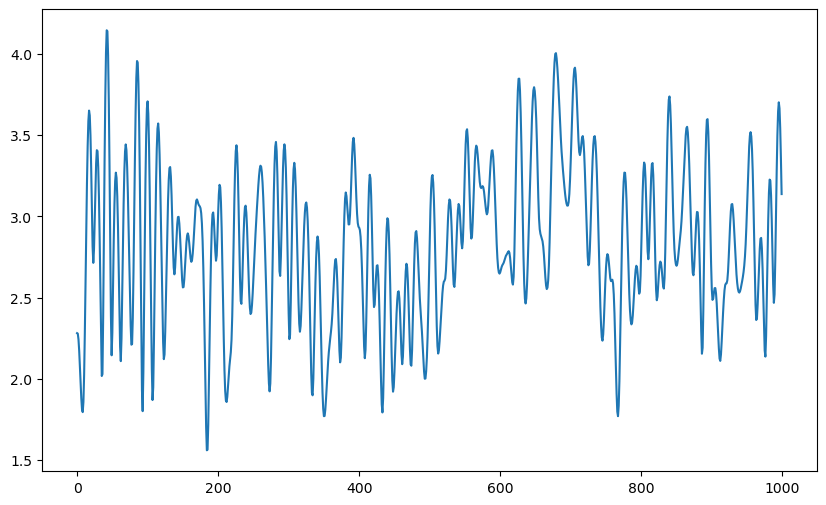

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot([i for i in range(len(dcs))], dcs, label="DC")